## spaCy &mdash; Industrial-Strength NLP in Python
Tutorial sources: [here](https://nlpforhackers.io/complete-guide-to-spacy/) and [here](https://github.com/explosion/spacy-notebooks) and also [here](https://www.kaggle.com/nirant/hitchhiker-s-guide-to-nlp-in-spacy)

[**spaCy**](https://spacy.io) is an industrial-strength natural language processing (_NLP_) library for Python. spaCy's goal is to take recent advancements in natural language processing out of research papers and put them in the hands of users to build production software.

![spaCy](images/spacy.png)

### It's really FAST ###
Written in Cython, it was specifically designed to be as fast as possible

### It's really ACCURATE ###
spaCy implementation of its dependency parser is one of the best-performing in the world:
[It Depends: Dependency Parser Comparison Using A Web-based Evaluation Tool](https://aclweb.org/anthology/P/P15/P15-1038.pdf)

### Batteries included ###
- **Index preserving tokenization** (details about this later)
- **Models** for Part Of Speech tagging, Named Entity Recognition and Dependency Parsing
- Supports **8 languages** out of the box
- Easy and **beautiful visualizations**
- Pretrained **word vectors**

### Extensible ###
It plays nicely with all the other already existing tools that you know and love: **Scikit-Learn**, **TensorFlow**, ...

### DeepLearning Ready ###
It also has its own deep learning framework that’s especially designed for NLP tasks:
[Thinc](https://github.com/explosion/thinc)

# Exercises

Why do we need specialized libraries like spaCy or NLTK? Let's see an example!

### 1.1. Splitting a document in sentences
This is easy, right?



In [88]:
def split_into_sentences(text):
    # your code here

feedback_simple = 'The schnitzel tastes good. The soup was too hot. The waiter was quick and polite.'
sentences = split_into_sentences(feedback_simple)
print('\n'.join(sentences))

IndentationError: expected an indented block (<ipython-input-88-f8a0b81f43a3>, line 4)

### 1.2. Splitting words

In [89]:
def split_into_words(sentence):
    # your code here

sentence = sentences[0]
words = split_into_words(sentence)
print('\n'.join(words))

IndentationError: expected an indented block (<ipython-input-89-3edcecd1208e>, line 4)

Still easy... What about this?

In [90]:
feedback_rude = '''The waiter was very rude, 
e.g. when I accidentally opened the wrong door
he screamed "Private!".'''

sentences = feedback_rude.split('.')
print('\n'.join(sentences))

The waiter was very rude, 
e
g
 when I accidentally opened the wrong door
he screamed "Private!"



Ups... not so nice! What should we do?

# spaCy to the rescue

## Load spaCy resources

In [91]:
# Import spacy and English models
import spacy

nlp = spacy.load('en')

## Language Processing Pipelines

- When you call nlp on a text, spaCy first **tokenizes** the text to produce a **Doc object**.
- The Doc is then processed in several different steps – this is also referred to as the **processing pipeline**. 
- The pipeline used by the default models consists of a **tagger**, a **parser** and an **entity recognizer**.

![pipeline](images/pipeline.svg)

More info [here](https://spacy.io/usage/processing-pipelines)

## Tokenization
The **Token** class exposes a lot of word-level attributes:

In [92]:
print(nlp.pipeline)

[('tagger', <spacy.pipeline.pipes.Tagger object at 0x18fa98eb8>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x18314b888>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x18314b8e8>)]


In [93]:
doc = nlp("Next week I'll be in Madrid.")
for token in doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))

Next	0	next	False	False	Xxxx	ADJ	JJ
week	5	week	False	False	xxxx	NOUN	NN
I	10	-PRON-	False	False	X	PRON	PRP
'll	11	will	False	False	'xx	AUX	MD
be	15	be	False	False	xx	VERB	VB
in	18	in	False	False	xx	ADP	IN
Madrid	21	Madrid	False	False	Xxxxx	PROPN	NNP
.	27	.	True	False	.	PUNCT	.


## Sentence detection

In [94]:
# Print sentences (one sentence per line)
doc = nlp("Garfield is a cat. Snoopy is a dog.")

for sent in doc.sents:
    print(sent)

Garfield is a cat.
Snoopy is a dog.


# Exercises

### 1.3. How many sentences are there in the following text?

*Hint: doc.sents is not a list, but a 'generator'. Convert it to a list first!*

In [123]:
text = "The path of the righteous man is beset on all sides by the iniquities of the selfish and the tyranny of evil men. Blessed is he who, in the name of charity and good will, shepherds the weak through the valley of darkness, for he is truly his brother's keeper and the finder of lost children. And I will strike down upon thee with great vengeance and furious anger those who would attempt to poison and destroy My brothers. And you will know My name is the Lord when I lay My vengeance upon thee."

# your code here


### 1.4. Print the sentences (one sentence per line, preceeded by the sentence number) 

In [96]:
# your code here

## Named Entity Recognition

spaCy can recognise various types of named entities in a document, by asking the model for a prediction. Because models are statistical and strongly depend on the examples they were trained on, this doesn't always work perfectly and might need some tuning later, depending on your use case.

-- from the amazing [spaCy docs](https://spacy.io/usage/linguistic-features#section-named-entities)


Doing NER with spaCy is super easy and the pretrained model performs pretty well:

### Entities Explained

- **PERSON**: People, including fictional.
- **NORP**: Nationalities or religious or political groups.
- **FAC**: Buildings, airports, highways, bridges, etc.
- **ORG**: Companies, agencies, institutions, etc.
- **GPE**: Countries, cities, states.
- **LOC**: Non-GPE locations, mountain ranges, bodies of water.
- **PRODUCT**: Objects, vehicles, foods, etc. (Not services.)
- **EVENT**: Named hurricanes, battles, wars, sports events, etc.
- **WORK_OF_ART**: Titles of books, songs, etc.
- **LAW**: Named documents made into laws. 
- **LANGUAGE**: Any named language.
- **DATE**: Absolute or relative dates or periods.
- **TIME**: Times smaller than a day.
- **PERCENT**: Percentage, including "%".
- **MONEY**: Monetary values, including unit.
- **QUANTITY**: Measurements, as of weight or distance.
- **ORDINAL**: " , "second", etc.
- **CARDINAL**: Numerals that do not fall under another type.

Doing NER with spaCy is super easy and the pretrained model performs pretty well:

In [97]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [98]:
explain_text_entities("Next week I'll be in London.")

Entity: Next week, Label: DATE, Absolute or relative dates or periods
Entity: London, Label: GPE, Countries, cities, states


Common entity types include *ORGANIZATION*, *PERSON*, *LOCATION*, *DATE*, *TIME*, *MONEY*, and *GPE* (geo-political entity). See complete list [here](https://spacy.io/usage/linguistic-features#entity-types).

In [99]:
explain_text_entities("I just bought 2 shares at 9 a.m. because the stock went up 30% in just 2 days according to the WSJ")

Entity: 2, Label: CARDINAL, Numerals that do not fall under another type
Entity: 9 a.m., Label: TIME, Times smaller than a day
Entity: 30%, Label: PERCENT, Percentage, including "%"
Entity: just 2 days, Label: DATE, Absolute or relative dates or periods
Entity: WSJ, Label: ORG, Companies, agencies, institutions, etc.


**displaCy** comes in handy for a better visualization:

In [100]:
from spacy import displacy

text = """But Google is starting from behind. The company made a late push into hardware, and Apple’s Siri, available on iPhones, and Amazon’s Alexa software, which runs on its Echo and Dot devices, have clear leads in consumer adoption."""
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

In [101]:
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(doc, style='ent', jupyter=True, options=options)
#displacy.serve(doc, style="ent", options=options)

# Exercise

### 1.5. Imagine you are a journalist who wants to publish a large set of documents while still hiding the identity of your sources. Can you write a function that masks all personal names, i.e. by replacing them with "[MASKED]"?


In [102]:
def mask_names(text):
    # your code here
    
original_text = "Harry Potter is a series of fantasy novels written by British author J. K. Rowling. The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic, and subjugate all wizards and Muggles (non-magical people)."
masked_text = mask_names(original_text)
doc = nlp(masked_text)
displacy.render(doc, style='ent', jupyter=True)


IndentationError: expected an indented block (<ipython-input-102-b6cf03236dc7>, line 4)

## Part Of Speech Tagging

Sometimes, we want to quickly pull out keywords, or keyphrases from a larger body of text. This helps us mentally paint a picture of what this text is about. This is particularly helpful in analysis of texts like long emails or essays.

As a quick hack, we can pull out all relevant "nouns". This is because most keywords are in fact nouns of some form.

In [103]:
# For each token, print corresponding part of speech tag
for token in doc:
    print('%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s' % (token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

But	but	CCONJ	CC	cc	Xxx	True	True
Google	Google	PROPN	NNP	nsubj	Xxxxx	True	False
is	be	VERB	VBZ	aux	xx	True	True
starting	start	VERB	VBG	ROOT	xxxx	True	False
from	from	ADP	IN	prep	xxxx	True	True
behind	behind	ADV	RB	pcomp	xxxx	True	True
.	.	PUNCT	.	punct	.	False	False
The	the	DET	DT	det	Xxx	True	True
company	company	NOUN	NN	nsubj	xxxx	True	False
made	make	VERB	VBD	ROOT	xxxx	True	True
a	a	DET	DT	det	x	True	True
late	late	ADJ	JJ	amod	xxxx	True	False
push	push	NOUN	NN	dobj	xxxx	True	False
into	into	ADP	IN	prep	xxxx	True	True
hardware	hardware	NOUN	NN	pobj	xxxx	True	False
,	,	PUNCT	,	punct	,	False	False
and	and	CCONJ	CC	cc	xxx	True	True
Apple	Apple	PROPN	NNP	compound	Xxxxx	True	False
’s	’s	PROPN	NNP	nsubj	’x	False	False
Siri	Siri	PROPN	NNP	nsubj	Xxxx	True	False
,	,	PUNCT	,	punct	,	False	False
available	available	ADJ	JJ	amod	xxxx	True	False
on	on	ADP	IN	prep	xx	True	True
iPhones	iPhones	PROPN	NNPS	pobj	xXxxxx	True	False
,	,	PUNCT	,	punct	,	False	False
and	and	CCONJ	CC	cc	xxx	True	True
Amazo

## Chunking

We need noun chunks. Noun chunks are noun phrases - not a single word, but a short phrase which describes the noun. For example, "the blue skies" or "the world’s largest conglomerate".

To get the noun chunks in a document, simply iterate over doc.noun_chunks:

In [104]:
doc = nlp("Wall Street Journal just published an interesting piece on crypto currencies")
for chunk in doc.noun_chunks:
    print(chunk.text, '\t', chunk.label_, '\t', chunk.root.text)

Wall Street Journal 	 NP 	 Journal
an interesting piece 	 NP 	 piece
crypto currencies 	 NP 	 currencies


Notice how the chunker also computes the *root* of the phrase, the main word of the phrase.

# Example

### What does Trump talk about?

It might be interesting to explore what does Trump even talk about? Is it always them 'Angry Dems'? Or is he a narcissist with too many mentions of The President and the USA?

One way to explore this would be to mine out all the entities and noun chunks from all his tweets! Let's go ahead and do that with amazing ease using spaCy

/Users/lpmayos/code/miniconda3/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


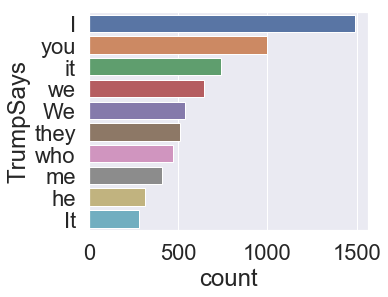

In [105]:
import seaborn as sns #for visualization
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')
sns.set(font_scale=2)

tweets = pd.read_csv("data/all_djt_tweets.csv")

text = tweets['text'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

doc = nlp(text)

items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

df_nouns = pd.DataFrame(items_of_interest, columns=["TrumpSays"])
plt.figure(figsize=(5,4))
sns.countplot(y="TrumpSays",
             data=df_nouns,
             order=df_nouns["TrumpSays"].value_counts().iloc[:10].index)
plt.show()


Hmm, this is interesting in stating he uses "I" a lot more than "we" and "We", put together, but not much beyond that. What topics does he talk about these filler words?

# Exercise

### 1.6. Can you plot the entities that Trump mentions the most?

Wow! Trump is really obsessed with Democrats, himself and Hillary.
We can use the **wordclouds** library to visualize it:

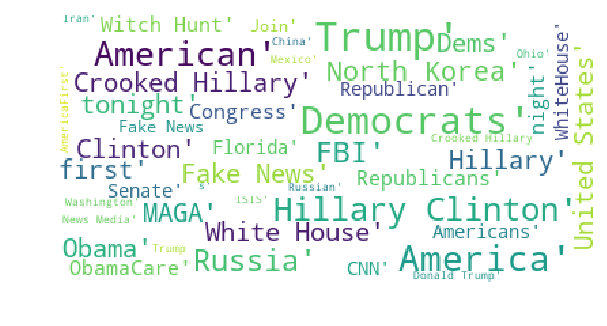

In [106]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(trump_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Dependency Parsing

Dependency parsing analyzes the **grammatical structure** of a sentence. It establishes a "tree" like structure between a "root" word and those that are related to it by branches of some manner.

In [107]:
doc = nlp('Wall Street Journal just published an interesting piece on crypto currencies')
 
for token in doc:
    print("{0}/{1}<--{2}-- {3}/{4}".format(
        token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

Wall/NNP<--compound-- Street/NNP
Street/NNP<--compound-- Journal/NNP
Journal/NNP<--nsubj-- published/VBD
just/RB<--advmod-- published/VBD
published/VBD<--ROOT-- published/VBD
an/DT<--det-- piece/NN
interesting/JJ<--amod-- piece/NN
piece/NN<--dobj-- published/VBD
on/IN<--prep-- piece/NN
crypto/JJ<--amod-- currencies/NNS
currencies/NNS<--pobj-- on/IN


If this doesn’t help visualizing the dependency tree, **displaCy** comes in handy:

In [108]:
from spacy import displacy

doc = nlp('Wall Street Journal just published an interesting piece on crypto currencies')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

## Using Linguistic annotations with spaCy Match

We want to find out what Trump is saying about

- Himself e.g. "I am rich".
- Russia
- Democrats

We want to start off by finding adjectives following "Democrats are" or "Democrats were".

This is obviously a very rudimentary solution, but it'll be fast, and a great way get an idea for what's in your data. Our pattern looks like this:

[{'LOWER': 'Russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]

This translates to a token whose lowercase form matches "democrats" (like Democrats, democrats or DEMoCrats), followed by a token with the lemma "be" (for example, is, was, or 's), followed by an optional adverb, followed by an adjective.

The optional adverb makes sure you won't miss adjectives with intensifiers, like "pretty awful" or "very nice".

This kind of adjective mining can then be used as features to do **aspect-based sentiment analysis**, which is finding sentiment with respect to specific entities or words.

In [109]:
from spacy.matcher import Matcher
# doc = nlp(text)
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches, label='MATCH'):
    """
    Function to help reformat data for displacy visualization
    """
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    
    # append mock entity for match in displaCy style to matched_sents
    
    if doc.vocab.strings[match_id] == 'DEMOCRATS':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'DEMOCRATS'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'RUSSIA':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'RUSSIA'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'I':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'NARC'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    
# declare different patterns
russia_pattern = [{'LOWER': 'russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
democrats_pattern = [{'LOWER': 'democrats'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
i_pattern = [{'LOWER': 'i'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]

matcher.add('DEMOCRATS', collect_sents, democrats_pattern)  # add pattern
matcher.add('RUSSIA', collect_sents, russia_pattern)  # add pattern
matcher.add('I', collect_sents, i_pattern)  # add pattern
matches = matcher(doc)

# 
for matched_sent in matched_sents:
    matched_sent['settings'] = {}
    matched_sent['title'] = {}


spacy.displacy.render(matched_sents, style='ent', manual=True, jupyter=True,  options = {'colors': {'NARC': '#6290c8', 'RUSSIA': '#cc2936', 'DEMOCRATS':'#f2cd5d'}})

## Word Vectors
spaCy comes shipped with a Word Vector model as well. We’ll need to download a larger model for that:
```bash
python -m spacy download en_core_web_lg
```

In [110]:
nlp = spacy.load('en_core_web_lg')
print(nlp.vocab['banana'].vector)

[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8815e-01
 -2.1359e-01  2.7401e-01  2.4095e-01  4.5950e-01 -1.8605e-01 -1.0497e+00
 -9.7305e-02 -1.8908e-01 -7.0929e-01  4.0195e-01 -1.8768e-01  5.1687e-01
  1.2520e-01  8.4150e-01  1.2097e-01  8.8239e-02 -2.9196e-02  1.2151e-03
  5.6825e-02 -2.7421e-01  2.5564e-01  6.9793e-02 -2

The closest word vector in the vocabulary for “man” – “king” + “woman” is still “King” but “Queen” comes right after :)

## Computing Similarity

Based on the word embeddings, spaCy offers a similarity interface for all of it’s building blocks: Token, Span, Doc and Lexeme. Here’s how to use that similarity interface:

In [111]:
banana = nlp.vocab['banana']
dog = nlp.vocab['dog']
fruit = nlp.vocab['fruit']
animal = nlp.vocab['animal']
 
print("'dog' is %s similar to 'animal' and %s similar to 'fruit'" % (dog.similarity(animal), dog.similarity(fruit)))
print("'banana' is %s similar to 'animal' and %s similar to 'fruit'" % (banana.similarity(animal), banana.similarity(fruit)))

'dog' is 0.6618534 similar to 'animal' and 0.23552851 similar to 'fruit'
'banana' is 0.24272855 similar to 'animal' and 0.67148364 similar to 'fruit'


Let’s now use this technique on entire texts:

In [112]:
target = nlp("Cats are beautiful animals.")
 
doc1 = nlp("Dogs are awesome.")
doc2 = nlp("Some gorgeous creatures are felines.")
doc3 = nlp("Dolphins are swimming mammals.")
doc4 = nlp("Snoopy is a very smart dog.")
doc5 = nlp("Tomorrow it will rain a lot in Berlin.")
 
print(target.similarity(doc1))
print(target.similarity(doc2))
print(target.similarity(doc3))
print(target.similarity(doc4))
print(target.similarity(doc5))

0.8901766262114666
0.9115828449161616
0.7822956256736615
0.7133323899064792
0.6526212010025575


### "king" - "man" + "woman" = "queen"?
There’s a really famous example of word embedding math: "king" - "man" + "woman" = "queen". Let’s test that out:

In [113]:
from scipy import spatial
 
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
 
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector
queen = nlp.vocab['queen'].vector
king = nlp.vocab['king'].vector
 
# We now need to find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
maybe_queen = king - man + woman

computed_similarities = []
 
for word in nlp.vocab:
    if word.has_vector:  # Ignore words without vectors
        similarity = cosine_similarity(maybe_queen, word.vector)
        computed_similarities.append((word, similarity))
 
computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
print([w[0].text for w in computed_similarities[:10]])

['King', 'KING', 'king', 'KIng', 'Queen', 'QUEEN', 'queen', 'Prince', 'PRINCE', 'prince']


-----
# Exercise

### 1.7. Can you compute how similar is  [[Paris]] – [[France]] + [[Germany]] to [[Berlin]]?

In [121]:
# your code here

### 1.8. Can you compute which word is the most similar to [[Paris]] – [[France]] + [[Germany]]?

In [115]:
# your code here

['germany', 'Germany', 'GERMANY', 'BERLIN', 'berlin', 'Berlin', 'Paris', 'paris', 'PARIS', 'FRANKFURT']


-----

## Extending spaCy

The entire spaCy architecture is built upon three building blocks: 
* **Document**: the big encompassing container, 
* **Token**: most of the time, a word
* and **Span**: set of consecutive Tokens. 

The extensions you create can add extra functionality to anyone of the these components. There are some examples out there for what you can do. Let’s create an extension ourselves.

### Creating Document level Extension

In [24]:
from spacy.tokens import Doc
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sentiment_analyzer = SentimentIntensityAnalyzer()
def polarity_scores(doc):
    return sentiment_analyzer.polarity_scores(doc.text)
 
Doc.set_extension('polarity_scores', getter=polarity_scores)
 
nlp = spacy.load('en')
doc = nlp("Really Whaaat event apple nice! it!")
print(doc._.polarity_scores)
# {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.5242}

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lpmayos/nltk_data...


{'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.5242}


In [25]:
doc = nlp("The movie was great!")
print(doc._.polarity_scores)

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


In [26]:
doc = nlp("I love that movie!")
print(doc._.polarity_scores)

{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}


In [28]:
doc = nlp("I LOVE that movie!")
print(doc._.polarity_scores)

{'neg': 0.0, 'neu': 0.277, 'pos': 0.723, 'compound': 0.7371}


In [29]:
doc = nlp("I LOVE this actor but the movie sucks!")
print(doc._.polarity_scores)

{'neg': 0.308, 'neu': 0.434, 'pos': 0.258, 'compound': -0.147}


-----

## Limitations of spaCy
- Tokenizers use probabilistic models.
- Lemma and POS can sometimes be wrong.
- Typically good enough.
- If not: build you own model.

## Do you want to learn more?

Visit [spaCy website](https://spacy.io/)!